In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/people.csv')
df


,Gender,Married,Age,Graduat,Profession,Experience,SpendingScore,FamilySize
0,NaN,No,22.0,NaN,NaN,1.0,Low,NaN
1,NaN,Yes,38.0,Yes,NaN,NaN,Average,3.0
2,NaN,Yes,NaN,Yes,Engineer,1.0,NaN,1.0
3,Male,Yes,NaN,NaN,Lawyer,0.0,High,NaN
4,NaN,Yes,NaN,Yes,NaN,NaN,High,6.0
...,...,...,...,...,...,...,...,...
7923,Male,No,22.0,No,NaN,NaN,Low,NaN
7924,Male,No,35.0,NaN,Executive,3.0,Low,4.0
7925,Female,No,NaN,Yes,Healthcare,NaN,Low,NaN
7926,Female,No,27.0,Yes,NaN,1.0,NaN,4.0


In [14]:
df.isnull().sum()


Gender           2678
Married             0
Age              2622
Graduat          2769
Profession       2671
Experience       3128
SpendingScore    2734
FamilySize       2806
dtype: int64

In [15]:
df.isnull().sum().sum()/df.shape[0]*df.shape[1]


np.float64(19.58425832492432)

In [16]:
df_s = df.sample(n=2000)


In [17]:
df_s


,Gender,Married,Age,Graduat,Profession,Experience,SpendingScore,FamilySize
5427,Male,No,19.0,NaN,Healthcare,NaN,Low,4.0
1199,Female,Yes,65.0,Yes,Lawyer,1.0,NaN,2.0
7191,Female,Yes,77.0,Yes,NaN,NaN,High,NaN
3429,Male,Yes,NaN,Yes,Artist,0.0,NaN,NaN
2287,NaN,No,22.0,No,Healthcare,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...
1829,Male,No,29.0,NaN,Healthcare,6.0,Low,3.0
157,NaN,Yes,35.0,Yes,NaN,3.0,Average,3.0
5354,Male,No,NaN,NaN,Entertainment,NaN,Low,NaN
7225,Female,Yes,39.0,NaN,Entertainment,NaN,Low,2.0


In [18]:
df_s.isnull().sum()

Gender           690
Married            0
Age              678
Graduat          701
Profession       707
Experience       771
SpendingScore    695
FamilySize       705
dtype: int64

In [19]:
df_s.isnull().sum().sum() / df_s.shape[0] * df_s.shape[1]


np.float64(19.788)

Age


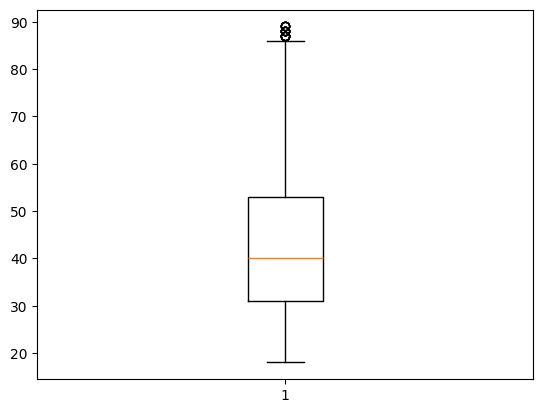

Experience


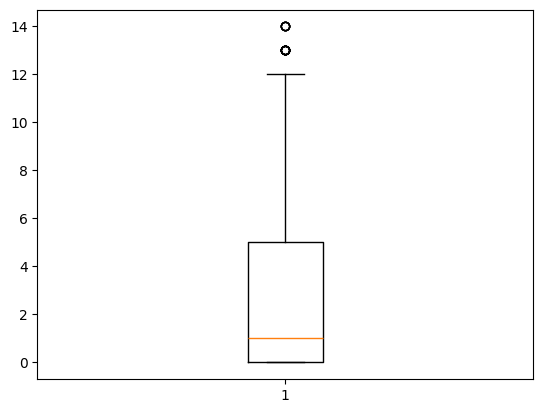

FamilySize


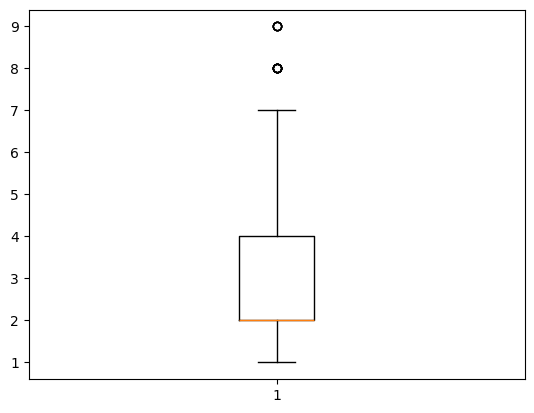

In [20]:
NUM = list(df_s.select_dtypes(include=['int64','float64']).columns)
for col in NUM:
    print(col)
    plt.boxplot(df_s[col].dropna())
    plt.show()


In [21]:
import scripts.algorithms_class as a

models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

name_class = 'Married'
selected_features = ['Gender', 'Age', 'Graduat', 'Profession', 'Experience',
        'SpendingScore', 'FamilySize', name_class]
selected_features_only = ['Gender', 'Age', 'Graduat', 'Profession', 'Experience',
        'SpendingScore', 'FamilySize']
df_s = df_s[selected_features]

param = {
    'DecisionTree': 200,
    'LogisticRegression': 1,
    'KNN': 30,
    'RandomForest': 250,
    'AdaBoost': 100,
    'SVC': 1
}

for m in models:
    a.classification(df_s[selected_features_only], df_s[name_class], m, param[m], 4)


Training for DecisionTree...
0.7859749101057054
Training for LogisticRegression...
0.8108520130520723
Training for KNN...
0.7942443851527763
Training for RandomForest...
0.8135836063627642
Training for AdaBoost...
0.8248121243551974
Training for SVC...
0.8033499643733593


In [22]:
df_s.to_csv('dataset/people.csv',index=False)
